Notebook: Data Exploration

In [1]:
# Imports
import matplotlib.pyplot as plt
from src.data_retrieval import init_osm
from src.preprocessing import load_roads, load_railways, get_local_crs, load_water_polygons, build_water_edges

from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

import os

Boundary

In [2]:
# CITY_NAME = "Copenhagen"
CITY_NAME = "Gdansk"

# Initialize OSM (boundary here is already the cleaned one; see below)
osm, boundary = init_osm(CITY_NAME)

Downloaded Protobuf data 'Gdansk.osm.pbf' (36.89 MB) to:
'/home/zuziaderylo/masters_thesis/data/Gdansk.osm.pbf'


In [3]:
# Determine CRS from boundary
local_epsg = get_local_crs(boundary)
print(local_epsg)

32634


In [4]:
# Check all administrative boundaries
boundaries = osm.get_boundaries()
print(boundaries[["name", "admin_level"]])

               name admin_level
0            Delfin          11
1    powiat gdański           6
2   powiat kartuski           6
3            Gdańsk           6
4             Sopot           6
..              ...         ...
65          Krępiec           8
66        Rokitnica           8
67         Radunica           8
68          Borkowo           8
69         Straszyn           8

[70 rows x 2 columns]


In [5]:
# # Initial boundary for Copenhagen
# initial_boundary = osm.get_boundaries(name="Københavns Kommune")

# Initial boundary for Gdańsk
initial_boundary = boundaries[
    (boundaries["name"] == "Gdańsk") & (boundaries["admin_level"] == "8")
]

# This is specified in CITY_CONFIG

In [6]:
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def plot_boundary_comparison(initial_boundary, cleaned_boundary, city_name=None, title="Boundary comparison", save_path=None):

    # Figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    ax1, ax2 = axes

    # Initial boundary
    if initial_boundary is not None and not initial_boundary.empty:
        initial_boundary.plot(
            ax=ax1,
            facecolor="bisque",
            edgecolor="black",
            linewidth=1,
            linestyle="--"
        )
    ax1.set_title("Initial Boundary", fontsize=24)
    ax1.axis("off")

    # RIGHT: Cleaned boundary
    if cleaned_boundary is not None and not cleaned_boundary.empty:
        cleaned_boundary.plot(
            ax=ax2,
            facecolor="bisque",
            edgecolor="black",
            linewidth=1,
            linestyle="--"
        )
    ax2.set_title("Cleaned Boundary", fontsize=24)
    ax2.axis("off")

    # Legend
    legend_handles = [
        mpatches.Patch(
            facecolor="bisque",
            edgecolor="black",
            linestyle="- -",
            linewidth=1,
            label="Boundary"
        )
    ]

    fig.legend(handles=legend_handles,
               loc="lower right",
               ncol=1,
               frameon=True,
               fontsize=20)

    # Layout
    plt.tight_layout()

    # Save (if requested)
    if save_path:
        filename = f"{city_name.lower()}_boundary_comparison.pdf"
        out_path = os.path.join(save_path, filename)
        plt.savefig(out_path, bbox_inches="tight")
        plt.close(fig)
    else:
        return fig, axes

    return fig, axes


In [7]:
# plot_boundary_comparison(initial_boundary, boundary, CITY_NAME, "boundary before and after", save_path="report/figures")

In [8]:
boundary.head()

,name,operator,visible,admin_level,boundary,id,timestamp,version,tags,osm_type,geometry,ref,website,changeset
2,Gdańsk,NaN,NaN,8,administrative,1040689950,1707127112,64,"{""alt_name:eo"":""Dancigo"",""alt_name:mk"":""\u0414...",relation,"POLYGON ((18.91313 54.31023, 18.91103 54.31159...",None,None,147086436.0


Roads

In [9]:
# Initial roads
initial_roads = osm.get_network(network_type="driving")

initial_roads.head()

/home/zuziaderylo/anaconda3/envs/masters/lib/python3.11/site-packages/pyrosm/networks.py:37: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  edges, nodes = prepare_geodataframe(


,access,area,bicycle,bridge,busway,cycleway,foot,highway,int_ref,junction,...,tracktype,tunnel,width,id,timestamp,version,tags,osm_type,geometry,length
0,None,None,None,None,None,None,None,motorway,E 28,None,...,None,None,None,4955597,1743600167,57,"{""visible"":false,""alt_name"":""Zachodnia Obwodni...",way,"MULTILINESTRING ((18.48786 54.43639, 18.48781 ...",677.0
1,None,None,None,None,None,None,None,residential,None,None,...,None,None,None,6138107,1755502409,16,"{""visible"":false,""old_name:de"":""Pfefferstadt"",...",way,"MULTILINESTRING ((18.64747 54.35539, 18.64752 ...",116.0
2,None,None,None,None,None,None,None,motorway_link,None,None,...,None,None,None,8064546,1733747149,25,"{""visible"":false,""source:maxspeed"":""sign""}",way,"MULTILINESTRING ((18.48615 54.42992, 18.48588 ...",299.0
3,None,None,None,None,None,None,no,secondary,None,None,...,None,None,None,8078875,1757805410,30,"{""visible"":false,""highway:category:pl"":""3"",""la...",way,"MULTILINESTRING ((18.49686 54.42878, 18.49608 ...",130.0
4,None,None,None,None,None,None,None,primary_link,None,None,...,None,None,None,8162338,1742771276,47,"{""visible"":false,""source:maxspeed"":""PL:urban"",...",way,"MULTILINESTRING ((18.64164 54.34858, 18.64155 ...",39.0


In [10]:
initial_roads.shape

(32120, 36)

In [11]:
initial_roads.columns

Index(['access', 'area', 'bicycle', 'bridge', 'busway', 'cycleway', 'foot',
       'highway', 'int_ref', 'junction', 'lanes', 'lit', 'maxspeed',
       'motorcar', 'motorroad', 'motor_vehicle', 'name', 'oneway',
       'overtaking', 'psv', 'ref', 'service', 'segregated', 'sidewalk',
       'smoothness', 'surface', 'tracktype', 'tunnel', 'width', 'id',
       'timestamp', 'version', 'tags', 'osm_type', 'geometry', 'length'],
      dtype='object')

In [12]:
# Checking what road types exist - print unique road types
print(initial_roads["highway"].unique())

['motorway' 'residential' 'motorway_link' 'secondary' 'primary_link'
 'tertiary' 'service' 'primary' 'living_street' 'unclassified'
 'trunk_link' 'secondary_link' 'tertiary_link' 'pedestrian' 'trunk'
 'footway' 'track' 'bus_stop' 'path' 'construction' 'steps' 'planned']


In [13]:
# Checking roads geometry type
print(initial_roads.geom_type.unique())

['MultiLineString']


In [14]:
# Checking number of road segments
len(initial_roads)

32120

In [15]:
# Load (preprocessed) roads
roads = load_roads(osm)

print("Roads:", roads.shape)
roads.head()

/home/zuziaderylo/anaconda3/envs/masters/lib/python3.11/site-packages/pyrosm/networks.py:37: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  edges, nodes = prepare_geodataframe(


Roads: (138385, 38)


,access,area,bicycle,bridge,busway,cycleway,foot,highway,int_ref,junction,...,width,id,timestamp,version,tags,osm_type,geometry,length,man_made,changeset
0,None,None,None,None,None,None,None,motorway,E 28,None,...,None,4955597,1743600167,57,"{""visible"":false,""alt_name"":""Zachodnia Obwodni...",way,"LINESTRING (18.48786 54.43639, 18.48781 54.43609)",677.0,NaN,NaN
1,None,None,None,None,None,None,None,motorway,E 28,None,...,None,4955597,1743600167,57,"{""visible"":false,""alt_name"":""Zachodnia Obwodni...",way,"LINESTRING (18.48781 54.43609, 18.48776 54.43573)",677.0,NaN,NaN
2,None,None,None,None,None,None,None,motorway,E 28,None,...,None,4955597,1743600167,57,"{""visible"":false,""alt_name"":""Zachodnia Obwodni...",way,"LINESTRING (18.48776 54.43573, 18.48774 54.43544)",677.0,NaN,NaN
3,None,None,None,None,None,None,None,motorway,E 28,None,...,None,4955597,1743600167,57,"{""visible"":false,""alt_name"":""Zachodnia Obwodni...",way,"LINESTRING (18.48774 54.43544, 18.48772 54.43519)",677.0,NaN,NaN
4,None,None,None,None,None,None,None,motorway,E 28,None,...,None,4955597,1743600167,57,"{""visible"":false,""alt_name"":""Zachodnia Obwodni...",way,"LINESTRING (18.48772 54.43519, 18.48770 54.43483)",677.0,NaN,NaN


Railways

In [16]:
# Extract initial railways 
rails = ["rail"]

initial_railways = osm.get_data_by_custom_criteria(custom_filter={
                                        'railway': rails},
                                        filter_type="keep")

initial_railways.head()

,railway,id,timestamp,version,tags,osm_type,geometry
0,rail,24534905,1765657766,21,"{""visible"":false,""electrified"":""contact_line"",...",way,"MULTILINESTRING ((18.57119 54.41182, 18.57143 ..."
1,rail,26806719,1765657766,19,"{""visible"":false,""electrified"":""contact_line"",...",way,"MULTILINESTRING ((18.61599 54.37807, 18.62237 ..."
2,rail,26807072,1765657766,18,"{""visible"":false,""bridge"":""yes"",""electrified"":...",way,"LINESTRING (18.57003 54.41542, 18.57008 54.41527)"
3,rail,27019509,1765657766,25,"{""visible"":false,""electrified"":""contact_line"",...",way,"MULTILINESTRING ((18.64487 54.35639, 18.64487 ..."
4,rail,27751832,1765657766,28,"{""visible"":false,""electrified"":""contact_line"",...",way,"MULTILINESTRING ((18.57610 54.40127, 18.57613 ..."


In [17]:
initial_railways.shape

(1150, 7)

In [18]:
initial_railways.columns

Index(['railway', 'id', 'timestamp', 'version', 'tags', 'osm_type',
       'geometry'],
      dtype='object')

In [19]:
# Checking roads geometry type
print(initial_railways.geom_type.unique())

['MultiLineString' 'LineString']


In [20]:
# Checking number of road segments
len(initial_railways)

1150

In [21]:
# Load (preprocessed) railways
railways = load_railways(osm)

print("Railways:", railways.shape)
railways.head()

Railways: (14541, 7)


,railway,id,timestamp,version,tags,osm_type,geometry
0,rail,24534905,1765657766,21,"{""visible"":false,""electrified"":""contact_line"",...",way,"LINESTRING (18.57119 54.41182, 18.57143 54.41122)"
0,rail,24534905,1765657766,21,"{""visible"":false,""electrified"":""contact_line"",...",way,"LINESTRING (18.57143 54.41122, 18.57153 54.41098)"
0,rail,24534905,1765657766,21,"{""visible"":false,""electrified"":""contact_line"",...",way,"LINESTRING (18.57153 54.41098, 18.57162 54.41074)"
0,rail,24534905,1765657766,21,"{""visible"":false,""electrified"":""contact_line"",...",way,"LINESTRING (18.57162 54.41074, 18.57162 54.41072)"
0,rail,24534905,1765657766,21,"{""visible"":false,""electrified"":""contact_line"",...",way,"LINESTRING (18.57162 54.41072, 18.57167 54.41061)"


Water

In [22]:
# Extract water bodies using the 'natural=water' tag
initial_water = osm.get_data_by_custom_criteria(
    custom_filter={"natural": ["water", "coastline"]},
    filter_type="keep"
)

initial_water.head()

,natural,water,wetland,id,timestamp,version,tags,osm_type,geometry,changeset
0,coastline,None,None,4216528,1762953623,27,"{""visible"":false,""source"":""PGS(could be inacur...",way,"MULTILINESTRING ((18.65110 54.40841, 18.64960 ...",NaN
1,coastline,None,None,4216550,1708762744,6,"{""visible"":false,""source"":""PGS""}",way,"MULTILINESTRING ((18.88321 54.34792, 18.87942 ...",NaN
2,coastline,None,None,4216580,1743281442,8,"{""visible"":false,""source"":""PGS(could be inacur...",way,"MULTILINESTRING ((18.73831 54.37430, 18.73432 ...",NaN
3,coastline,None,None,4318600,1599006140,10,"{""visible"":false}",way,"MULTILINESTRING ((18.79762 54.36551, 18.78856 ...",NaN
4,coastline,None,None,4318601,1658174067,10,"{""visible"":false}",way,"MULTILINESTRING ((18.77899 54.37067, 18.77736 ...",NaN


In [23]:
initial_water.shape

(800, 10)

In [24]:
initial_water.columns

Index(['natural', 'water', 'wetland', 'id', 'timestamp', 'version', 'tags',
       'osm_type', 'geometry', 'changeset'],
      dtype='object')

In [25]:
# Checking rails geometry type
print(initial_water.geom_type.unique())

['MultiLineString' 'Polygon' 'LineString' 'MultiPolygon']


In [26]:
# Checking number of water geometries
len(initial_water)

800

In [27]:
# Load (preprocessed) water features
water_polygons = load_water_polygons(osm)
water_edges = build_water_edges(water_polygons)

print("Water polygons:", water_polygons.shape)
print("Water edges:", water_edges.shape)
water_polygons.head()

Water polygons: (1184, 14)
Water edges: (1843, 14)


,natural,water,wetland,basin,landuse,waterway,id,timestamp,version,tags,osm_type,geometry,dock,changeset
0,water,None,None,None,None,None,4318602,1743371045,12,"{""visible"":false,""name"":""Jezioro Ptasi Raj""}",way,"POLYGON ((18.78716 54.35847, 18.78707 54.35866...",NaN,NaN
1,water,river,None,None,None,None,4318604,1751369852,56,"{""visible"":false,""intermittent"":""no""}",way,"POLYGON ((18.82433 54.34115, 18.82455 54.34120...",NaN,NaN
2,water,river,None,None,None,None,4318605,1752259410,26,"{""visible"":false}",way,"POLYGON ((18.86059 54.31313, 18.86059 54.31314...",NaN,NaN
3,water,None,None,None,None,None,4349462,1710946051,20,"{""visible"":false,""name"":""Jezioro Jasie\u0144"",...",way,"POLYGON ((18.53004 54.34377, 18.52974 54.34423...",NaN,NaN
4,water,lake,None,None,None,None,15439519,1688654036,33,"{""visible"":false,""name"":""Jezioro Wysockie"",""na...",way,"POLYGON ((18.44321 54.42009, 18.44325 54.42013...",NaN,NaN


In [28]:
water_edges.head()

,natural,water,wetland,basin,landuse,waterway,id,timestamp,version,tags,osm_type,geometry,dock,changeset
0,water,None,None,None,None,None,4318602,1743371045,12,"{""visible"":false,""name"":""Jezioro Ptasi Raj""}",way,"LINESTRING (18.78716 54.35847, 18.78707 54.358...",NaN,NaN
1,water,river,None,None,None,None,4318604,1751369852,56,"{""visible"":false,""intermittent"":""no""}",way,"LINESTRING (18.82433 54.34115, 18.82455 54.341...",NaN,NaN
2,water,river,None,None,None,None,4318605,1752259410,26,"{""visible"":false}",way,"LINESTRING (18.86059 54.31313, 18.86059 54.313...",NaN,NaN
3,water,None,None,None,None,None,4349462,1710946051,20,"{""visible"":false,""name"":""Jezioro Jasie\u0144"",...",way,"LINESTRING (18.53004 54.34377, 18.52974 54.344...",NaN,NaN
4,water,lake,None,None,None,None,15439519,1688654036,33,"{""visible"":false,""name"":""Jezioro Wysockie"",""na...",way,"LINESTRING (18.44321 54.42009, 18.44325 54.420...",NaN,NaN


POIs

In [29]:
# Extract all points of interest (POIs)
initial_pois = osm.get_pois()

initial_pois.head()

,id,tags,changeset,timestamp,version,lat,lon,visible,addr:city,addr:country,...,geometry,osm_type,building:levels,car_wash,landuse,police,restaurant,school,taxi,water
0,301684257,None,12759127.0,1345190096,4,54.344799,18.501720,False,None,None,...,POINT (18.50172 54.34480),node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,304519543,"{""height"":""15 m"",""man_made"":""tower"",""material""...",172713966.0,1759334997,11,54.411671,18.550772,False,None,None,...,POINT (18.55077 54.41167),node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,320884306,"{""check_date"":""2025-06-30""}",168313568.0,1751295216,4,54.378124,18.614750,False,Gdańsk,PL,...,POINT (18.61475 54.37812),node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,321745520,"{""check_date"":""2025-02-03"",""contact:email"":""mo...",174219020.0,1762306284,12,54.376236,18.614084,False,Gdańsk,PL,...,POINT (18.61408 54.37624),node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,442254546,None,164504663.0,1743767866,4,54.360142,18.709036,False,None,None,...,POINT (18.70904 54.36014),node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
initial_pois.shape

(33140, 84)

In [31]:
initial_pois.columns

Index(['id', 'tags', 'changeset', 'timestamp', 'version', 'lat', 'lon',
       'visible', 'addr:city', 'addr:country', 'addr:housenumber',
       'addr:housename', 'addr:postcode', 'addr:place', 'addr:street', 'email',
       'name', 'opening_hours', 'operator', 'phone', 'ref', 'url', 'website',
       'amenity', 'atm', 'bicycle_parking', 'bicycle_rental', 'bar',
       'building', 'cafe', 'drinking_water', 'fast_food', 'fountain', 'fuel',
       'gambling', 'internet_access', 'office', 'parking', 'post_office',
       'social_facility', 'source', 'start_date', 'wikipedia', 'alcohol',
       'bicycle', 'books', 'butcher', 'clothes', 'collector', 'craft',
       'fireplace', 'furniture', 'hairdresser', 'lottery', 'massage',
       'medical_supply', 'motorcycle', 'organic', 'outdoor', 'pastry', 'pet',
       'religion', 'second_hand', 'shoes', 'shop', 'swimming_pool', 'trade',
       'wholesale', 'attraction', 'guest_house', 'information', 'museum',
       'tourism', 'viewpoint', 'geomet

In [32]:
# Checking POIs geometry type
print(initial_pois.geom_type.unique())

['Point' 'Polygon' 'MultiLineString' 'LineString' 'MultiPolygon']


In [33]:
# Count number of POIs per geometry type
initial_pois.geom_type.value_counts()


Point              26146
Polygon             6962
LineString            13
MultiPolygon          11
MultiLineString        8
Name: count, dtype: int64

In [34]:
# Check value counts for top 20 POI types
print(initial_pois["amenity"].value_counts(dropna=False).head(20))

amenity
bench                   8002
None                    6108
parking                 4240
waste_basket            3075
bicycle_parking         1656
parking_entrance        1121
parking_space           1073
parcel_locker            703
recycling                623
shelter                  620
restaurant               562
waste_disposal           559
vending_machine          462
bicycle_rental           419
fast_food                315
atm                      285
kick-scooter_parking     269
kindergarten             178
cafe                     164
toilets                  156
Name: count, dtype: int64


In [35]:
print(initial_boundary.crs)
print(initial_pois.crs)
print(initial_railways.crs)
print(initial_roads.crs)
print(initial_water.crs)

epsg:4326
epsg:4326
epsg:4326
epsg:4326
epsg:4326


In [36]:
print(boundary.crs)
print(roads.crs)
print(railways.crs)
print(water_polygons.crs)
print(water_edges.crs)

epsg:4326
epsg:4326
epsg:4326
epsg:4326
epsg:4326


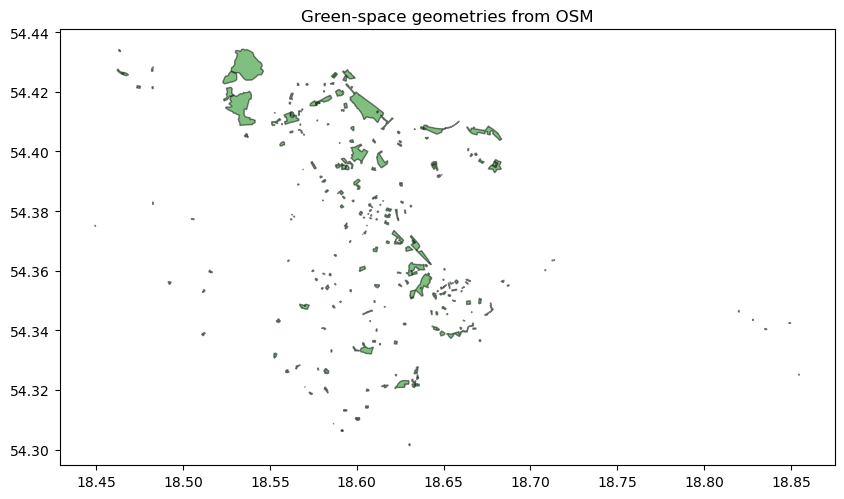

Loaded 251 green-space features


In [37]:
# Load green areas
green_spaces = osm.get_data_by_custom_criteria(
    custom_filter={
        "leisure": ["park"],
        "landuse": ["recreation_ground"]
    },
    filter_type="keep"
)

# Drop invalid geometries
green_spaces = green_spaces[~green_spaces.geometry.is_empty & green_spaces.geometry.notna()].copy()

# Plot only the green spaces
fig, ax = plt.subplots(figsize=(10, 10))
green_spaces.plot(ax=ax, color="green", edgecolor="black", alpha=0.5)
plt.title("Green-space geometries from OSM")
plt.show()

print(f"Loaded {len(green_spaces)} green-space features")